<a href="https://colab.research.google.com/github/janeaf/Geiser/blob/main/Geiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

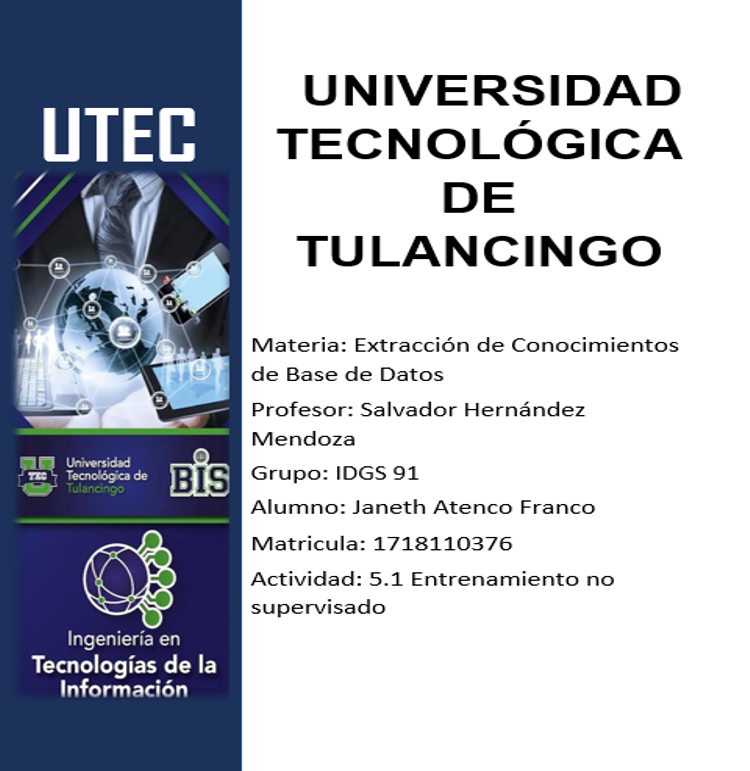

# **Aprendizaje no supervisado**

# **Problematica**
Se tiene un conjunto de datos de erupcion de geiseres, se desea clasificar para realizar un estudio. 
Los datos obtenidos son:
*TimeEruption - Tiempo de erupcion en minutos. 
*TimeWaiting - Tiempo de espera para la siguiente erupcion.

# **Importar Librerias**

In [27]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# **Versiones**

In [15]:
print("Pandas()", format(pd.__version__))
print("Numpy()", format(np.__version__))
print("Tensorflow()", format(tf.__version__))
print("Sklearn()", format(sklearn.__version__))

Pandas() 1.1.5
Numpy() 1.19.5
Tensorflow() 2.7.0
Sklearn() 1.0.1


In [14]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.8
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3


# **Cargar Dataset**

In [28]:
df = pd.read_csv("geisers.csv",delimiter=',',header='infer')

# **Informacion del Dataframe**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [30]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [31]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# **Graficar el Dataframe**

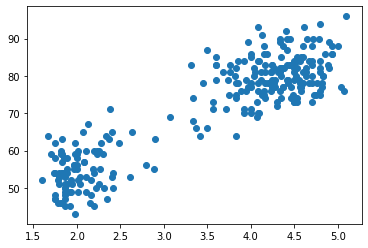

In [34]:
plt.scatter(df['TimeEruption'],df['TimeWaiting'])
plt.show()

# **Datos Aleatorios**

In [149]:
TimeEruption = np.random.randint(100, size=100)
TimeWaiting = np.random.randint(100, size=100)

data = {
    'TimeEruption' : TimeEruption,
    'TimeWaiting' : TimeWaiting
}
df_s = pd.DataFrame(data)

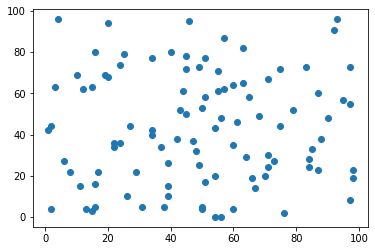

In [150]:
plt.scatter(df_s['TimeEruption'],df_s['TimeWaiting'])
plt.show()

# **Configurar Modelo**

In [151]:
model = KMeans(n_clusters=2, max_iter=100)

# **Estandarizar Datos**

In [152]:
df = StandardScaler().fit_transform(df)

# **Graficar Valores Estandarificados**

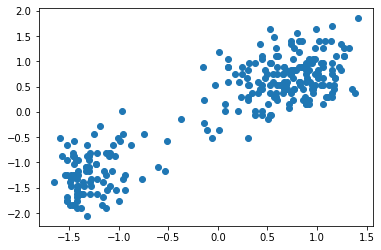

In [153]:
plt.scatter(df[:,0],df[:,1])
plt.show()

# **Entrenamiento**

In [154]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

# **Centroides**

In [155]:
centroids = model.cluster_centers_
centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

# **Ver las etiquetas**

In [156]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

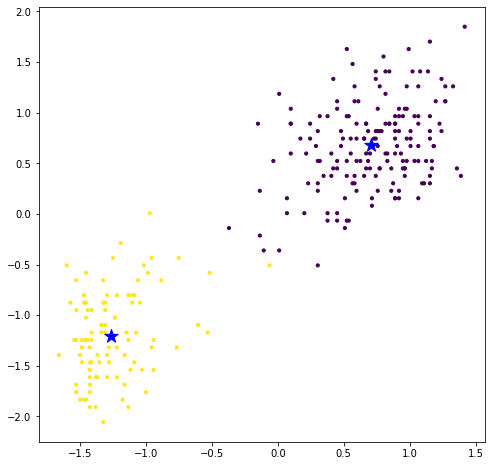

In [157]:
plt.figure(figsize=(8,8))
plt.scatter(df[:,0],df[:,1],c=model.labels_.astype(float),s=10, label='clusters')
plt.scatter(centroids[:,0], centroids[:,1], c='blue', marker='*',s=200, label='centroides')
plt.show()

# **Predicciones**

In [124]:
new_label= model.predict([[-1.5,-0.5]])
new_label

array([0], dtype=int32)

# **Seleccionar el numero de clousters**

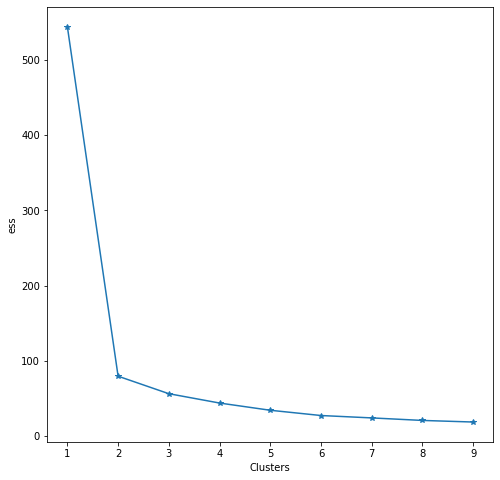

In [133]:
ess = []
list_k = list(range(1,10))
for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k, ess, "-*")
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

# **Graficar con distintos Clouster**

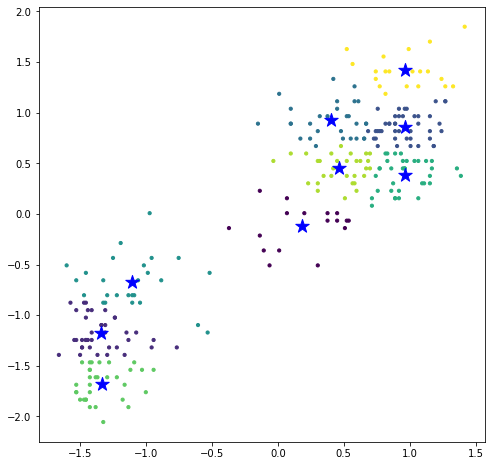

In [135]:
list_k = list(range(1,10))
for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
centroids = model.cluster_centers_
plt.figure(figsize=(8,8))
plt.scatter(df[:,0],df[:,1],c=model.labels_.astype(float),s=10, label='clusters')
plt.scatter(centroids[:,0], centroids[:,1], c='blue', marker='*',s=200, label='centroides')
plt.show()

# **Conclusion**

Considero que fue interesante cada uno de los temas vistos a lo largo del cuatrimestre ya que pudimos ver las diferentes formas de poder graficar, tambien la implementacion de las predicciones, tambien la importancia de observar todo con algo diferente puede dar resultados distintos, al final es un conocimiento que sera util y posiblemente ejecutar en el futuro.